# Simulering av Solsystemet med Interaksjoner

Målet her er at skal du skrive en Pythonkode som regner ut banene til planetene i solsystemet vårt basert på data hentet ut fra [NASA JPL Horizons System](https://ssd.jpl.nasa.gov/horizons/app.html#/). Her skal du ta med kraften fra alle planetene på hverandre (inkludert solen), ikke bare kraften fra solen på planetene.



Til slutt skal du produsere en animasjon som viser planetbanene. I figuren under ser du et eksempel på sluttproduktet.


```{figure} ../../../codes/physics/solar_system/animations/solsystemet_2d.gif
:name: solsystemet_2d

Animasjonen viser planetbanene til de fem innerste planetene inkludert solen i 2d.


```


## Bakgrunnsteori

### Gravitasjonsloven fra ett legeme på et annet

I fysikken i videregående skole lærer man at gravitasjonsloven kan skrives som

$$
F = -\gamma \frac{m_1 m_2}{r^2},
$$

der $r$ er avstanden mellom de to legemene, $m_1$ og $m_2$ er massene til objektene og $\gamma$ er gravitasjonskonstanten.

Svakheten med denne loven er at kraften er en vektorstørrelse og har retning, mens vi med loven over kun regner ut størrelsen. I tillegg antar den at kilden til gravitasjonskraften er i origo i koordinatsystemet vi bruker. I stedet kan vi skrive loven slik:

$$
\vec{F}_1 = -\gamma m_1 m_2 \frac{\vec{r}_1 - \vec{r}_2}{|\vec{r}_1 - \vec{r}_2|^3},
$$

der kraften virker på masse $m_1$ i posisjon $\vec{r}_1$ fra legeme med masse $m_2$ i posisjon $\vec{r}_2$. Tanken her er at legeme 2 er solen, og legeme 1 er alle de andre planetene. Fordelen med denne formuleringen er at vi får med retningsvektoren også! 



### En mer generell gravitasjonslov

 Skal man håndtere solsystemet fullstendig, må man ta hensyn til at de har interaksjoner mellom hverandre. Hvert eneste legeme tiltrekker hverandre. Da får vi nytte for en mer generell form av gravitasjonsloven:

$$
\vec{F}_{i} = -\gamma m_i\sum_{j \neq i} m_j \frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^3}, 
$$

der $\vec{r}_i$ er posisjonen til legeme $i$, $m_i$ er massen til legeme $i$ og $\gamma$ er gravitasjonskonstanten. Tilsvarende er $\vec{r}_j$ og $m_j$ posisjonen og massen til legeme $j$. Størrelsen $\vec{F}_i$ er kraften som virker på legeme $i$ fra alle andre legemer i systemet. I tilfellet her kunne for eksempel $i$ vært jorden, og da vil $\vec{F}_i$ være kraften som virker på jorden fra solen og de andre plantene i solsystemet. 

### Newtons 2.lov

Når vi ønsker å finne bevegelsen til et legeme over tid, er Newtons 2.lov vår *go-to* lov. Kjenner vi alle kreftene på legeme, kan vi finne bevegelsen til legemet over tid. Newtons 2.lov kan oppsummeres som


$$
\sum_{n} \vec{F}_n = m_i\vec{a}_i,
$$

I dette tilfellet, er summen av kreftene den totale gravitasjonskraften som virker på legemet. For legemet $i$ kan vi skrive dette som

$$
m_i\vec{a}_i = -\gamma m_i\sum_{j \neq i} m_j \frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^3}, 
$$

som gir

$$
\vec{a}_i = -\gamma \sum_{j \neq i} m_j \frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^3}.
$$



### Velocity Verlet-algoritmen

Solsystemet er et system der energien er bevart. Du har kanskje sett Euler-Comer før, men her skal vi bruke en annen numerisk metode som også bevarer energi, en såkalt *symplektisk* integrator. En slik metode vil holde energien konstant i gjennomsnitt over tid. I praksis vil vi observere at verdien til energien svinger frem og tilbake om startverdien. Euler-Cromer svinger i mye større grad enn den metoden vi skal bruke.

Vi skal benytte oss av en annen symplektisk metode som kallet for *velocity Verlet*-algoritmen. Anta at

$$
\vec{a}_i(t) = \vec{f}(\vec{r}_1(t), \vec{r}_2(t), \ldots, \vec{r}_{n}(t)),
$$

gir oss akselerasjon ved tidspunkt $t$, og $\vec{r}_1(t), \vec{r}_2(t), \ldots, \vec{r}_n(t)$ er posisjonene til planetene ved tidspunkt $t$. Da kan vi regne ut neste posisjon og hastighet til planet $i$ (med en steglengde $\Delta t$ tid):

$$
\begin{align*}
\vec{r}_i(t + \Delta t) & \approx \vec{r}_i(t) + \vec{v}_i(t) \Delta t + \frac{1}{2}\vec{a}_i(t) \Delta t^2, \\
\vec{v}_i(t + \Delta t) & \approx \vec{v}_i(t) + \frac{1}{2}\left[\vec{a}_i(t) + \vec{a}_i(t + \Delta t)\right]\Delta t.
\end{align*}
$$

```{admonition} Typisk fallgruve
:class: tip, dropdown

En typisk fallgruve her er at man bruke algoritmen direkte på én planet av gangen, men siden akselerasjonen til hver planet er avhengig av posisjonen til alle de andre, må bare gjøre *steg 1* av algoritmen på **alle** planetene før man gjøre steg to på **alle** planetene. Med andre ord

1. Oppdater posisjonen til **alle** planetene først (inkludert solen). 
2. Deretter oppdater hastigheten til **alle** planetene (inkludert solen). 
```

### Astronomiske enheter

Når man regner på planetbaner, er det nyttig å jobbe med andre enheter fordi størrelsene vi jobber med er såpass store. Avstandene spenner flere millioner kilometer og tiden spenner flere jordår. Derfor velger vi å:

- Måle avstander i astronomiske enheter, AU. (1 AU er gjennomsnittsavstanden mellom jorden og solen. Ca. 150 millioner km.)
- Mål hastigheter i AU/år (AU/jordår). 
- Måle tid i år (jordår). 
- Masse måles i antall *solmasser* $M_\odot = 2\cdot 10^{30} \ \text{kg}$. (1 solmasse er massen til sola vår). *Hint: for å omgjøre en masse til solmasser, deler man massen med solmassen. Da får du hvor mange solmasser den massen utgjør*.
- Gravitasjonskonstanten $\gamma$ er tilnærmet gitt ved $\gamma = 4\pi^2 \ \text{AU}^3/(\text{år}^2 M_\odot)$ i astronomiske enheter. Det er en konsekvens som følger fra Keplers 3.lov. Hvis du tenker over enhetene, så gir de mening fordi vi har satt $\text{m} \to \text{AU}$, og $\text{s} \to \text{år}$, og $\text{kg} \to M_\odot$.

## Oppgaver

### Oppgave 1: Last inn datasettet

#### Hvordan laste ned datasettet
Last ned datasettet med følgende kode:

In [2]:
import requests
import json
url = "https://raw.githubusercontent.com/reneaas/vgs_programmering/main/datasets/solar_system/solsystem_data.json"
r = requests.get(url, allow_redirects=True)

with open("solsystem_data.json", "wb") as outfile:
    outfile.write(r.content)

For de to første legemene i datasettet, ser det slik ut (alle de andre legemene har lik struktur):

In [11]:
import os

tmp = os.system("head -n 19 solsystem_data.json ")

{
    "sun": {
        "masse": 1.0,
        "x": -0.008647947560257333,
        "y": -0.0016038052487075002,
        "z": 0.00021473113169279278,
        "vx": 0.0011252958108073426,
        "vy": -0.0030146325639545677,
        "vz": -2.240028321888302e-07
    },
    "mercury": {
        "masse": 1.6605481518732714e-07,
        "x": -0.39470478678463916,
        "y": -0.001499234445048278,
        "z": 0.03563417054707482,
        "vx": -2.1393659644147514,
        "vy": -9.837653083758232,
        "vz": -0.6073567665826703
    },


Skriv en funksjon som leser inn dataen. Den skal gjøre følgende:

1. Plassere posisjonene i et array `r` med dimensjonen (`shape`) `(antall_planeter, 3)`.
2. Plassere hastighetene i et array `v` med dimensjonen (`shape`) `(antall_planeter, 3)`.
3. Plassere massene i et array `m` med dimensjonen (`shape`) `(antall_planeter,)`.

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`*.


````{dropdown} Kodehint: lage et array med riktig dimensjon
Du kan lage et "tomt" array (fylt med nuller) med

```python
import numpy as np

r = np.zeros(shape=(dim1, dim2))

```

der `dim1` er den første dimensjonen og `dim2` er en den andre dimensjonen.

Har du bare én dimensjon, som for massene, kan du bruke

```python
m = np.zeros(shape=(dim1,))
```

````

In [ ]:
import numpy as np
import json

def les_data(filnavn):

    with open(filnavn, "r") as infile:
        data = json.load(infile)

    antall_planeter = len(data)

    r = np.zeros(shape=NotImplemented)
    v = np.zeros(shape=NotImplemented)
    m = np.zeros(shape=NotImplemented)

    for i, planet in enumerate(data):
        x = data.get(planet).get("x")
        y = NotImplemented
        z = NotImplemented

        vx = data.get(planet).get("vx")
        vy = NotImplemented
        vz = NotImplemented

        masse = data.get(planet).get("masse")

        r[i, 0] = x
        r[i, 1] = NotImplemented
        r[i, 2] = NotImplemented
        
        v[i, 0] = vx
        v[i, 1] = NotImplemented
        v[i, 2] = NotImplemented

        m[i] = NotImplemented
    navn = list(data.keys())
    return r, v, m, navn

# Eksempel på funksjonskall for å hente ut dataen    
r, v, m, navn = les_data(filnavn="solsystem_data.json")

````{dropdown} Løsningsforslag 

``` python
import numpy as np
import json

def les_data(filnavn):

    with open(filnavn, "r") as infile:
        data = json.load(infile)

    antall_planeter = len(data)
    r = np.zeros(shape=(antall_planeter, 3))
    v = np.zeros(shape=(antall_planeter, 3))
    m = np.zeros(shape=(antall_planeter,))

    for i, planet in enumerate(data):
        x = data.get(planet).get("x")
        y = data.get(planet).get("y")
        z = data.get(planet).get("z")

        vx = data.get(planet).get("vx")
        vy = data.get(planet).get("vy")
        vz = data.get(planet).get("vz")

        masse = data.get(planet).get("masse")

        r[i, 0] = x
        r[i, 1] = y
        r[i, 2] = z
        
        v[i, 0] = vx
        v[i, 1] = vy
        v[i, 2] = vz

        m[i] = masse

    navn = list(data.keys())
    return r, v, m, navn

# Eksempel på funksjonskall for å hente ut dataen    
r, v, m, navn = les_data(filnavn="solsystem_data.json")
```
````

### Oppgave 2: regn ut akselerasjonen

Skriv en funksjon `get_akselerasjon(r, m, i)` som regner ut akselerasjon til legeme `i`. Her er `r` alle posisjonene til legemene på et spesifikt tidspunkt og `m` er massen til legemene.

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`*.


In [19]:
import numpy as np

def get_akselerasjon(r, m, i, G=4 * np.pi**2):
    # Hvor mange dimensjoner er det for akselerasjonen til én planet?
    a = np.zeros(shape=NotImplemented) 
    
    # regn ut akselerasjonen pga alle de andre planetene
    for j in range(len(r)):
        # bare regn ut når vi ser på et annet legeme enn legeme i
        if i != j:

            # regn ut differansevektoren r_i - r_j
            dr = NotImplemented
            
            # Regn ut lengden av differansevektoren r_i - r_j
            dr_norm = NotImplemented

            # Regn ut akselerasjonen. `-=` fordi gravitasjonskraften er tiltrekkende.
            a -= NotImplemented
    
    return a

````{dropdown} Løsningsforslag

```python
import numpy as np

def get_akselerasjon(r, m, i, G=4 * np.pi**2):
    # Hvor mange dimensjoner er det for akselerasjonen til én planet?
    a = np.zeros(shape=(3,)) 
    
    # regn ut akselerasjonen pga alle de andre planetene
    for j in range(len(r)):
        # bare regn ut når vi ser på et annet legeme enn legeme i
        if i != j:

            # regn ut differansevektoren r_i - r_j
            dr = r[i] - r[j]
            
            # Regn ut lengden av differansevektoren r_i - r_j
            dr_norm = np.linalg.norm(dr)

            # Regn ut akselerasjonen
            a -= G * m[j] * dr / dr_norm**3
    
    return a
```
````

### Oppgave 3: regne ut energien til systemet 

Her skal du skrive to funksjoner som regner ut energien til systemet. Den første funksjonen skal regne ut kinetisk energi, og den andre skal regne ut potensiell energi. Deretter skal du bringe de sammen til en tredje funksjon som regner ut den totale energien.

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`*.

```{dropdown} Påminnelse: Kinetisk energi
Den kinetiske energien til en masse $m$ med en hastigheten $\vec{v}$ er gitt ved

$$
K = \frac{1}{2}m \vec{v}^2,
$$

der du kan tolke $\vec{v}^2$ som prikk-produktet $\vec{v}\cdot \vec{v}$, eller bare som lengden av vektoren i andre! 

Når vi har $n$ masser $m_1, m_2, \ldots m_n$ med hastighetsvektorer $\vec{v}_1, \vec{v}_2, \ldots \vec{v}_n$, blir den totale kinetiske energien summen av den kinetiske energien til hvert legeme, som dette: 

$$
K = \frac{1}{2}m_1 \vec{v}_1^2 + \frac{1}{2}m_2 \vec{v}_2^2 + \ldots + \frac{1}{2}m_n \vec{v}_n^2 = \frac{1}{2}\sum_{i=1}^n m_i \vec{v}_i^2.
$$
```

```{dropdown} Påminnelse: Potensiell energi
Den potensielle energien til et legeme $i$ i et system med ett annet legeme $j$ er gitt ved

$$
V_i = -\gamma \frac{m_i m_j}{|\vec{r}_i - \vec{r}_j|}.
$$

Når legemet $i$ har $n-1$ andre legemer som virker på det, kan vi generalisere utregningen slik:

$$
V_i = - \sum_{j=1, j\neq i}^n \gamma\frac{m_i m_j}{|\vec{r}_i - \vec{r}_j|}.
$$

Den generelle formelen vi kan bruke for å regne ut den potensielle energien til systemet er

$$
V = -\sum_{i=1}^n\sum_{j=i + 1}^n \gamma \frac{m_i m_j}{|\vec{r}_i - \vec{r}_j|}.
$$

En alternativ formel, dersom du syns den over ser vanskelig ut å skrive kode for, er

$$
V = -\frac{1}{2}\sum_{i=1}^n\sum_{j=1, j\neq i}^n \gamma \frac{m_i m_j}{|\vec{r}_i - \vec{r}_j|}.
$$

I den siste formelen deler vi på 2 fordi vi regner ut samme potensielle energi fra hvert legeme dobbelt opp, så hvis vi halverer bidraget får vi samme resultat. Ulempen er at vi gjør flere utregninger enn nødvendig, så det går litt tregere med denne formelen.

```

In [ ]:
def get_kinetisk_energi(v, m):
    K = 0

    for i in range(len(v)):
        # regn ut farten til legeme i
        vi = NotImplemented
        vi_norm = NotImplemented

        # regn ut kinetisk energi til legeme i
        K += NotImplemented

    return K


def get_potensiell_energi(r, m, G=4 * np.pi**2):
    V = 0

    for i in range(len(r)):
        for j in range(i + 1, len(r)):
            if i != j:
                # regn ut differansevektoren r_i - r_j
                dr = NotImplemented
                
                # Regn ut lengden av differansevektoren r_i - r_j
                dr_norm = NotImplemented

                # Regn ut potensiell energi. Husk at det er negativt fortegn. Derfor `-=`.
                V -= NotImplemented
    
    return V


def get_total_energi(r, v, m):
    K = NotImplemented
    V = NotImplemented
    E = NotImplemented

    return E

````{dropdown} Løsningsforslag

Funksjonen for kinetisk energi:

```python
def get_kinetisk_energi(v, m):
    K = 0

    for i in range(len(v)):
        # regn ut farten til legeme i
        vi = v[i]
        vi_norm = np.linalg.norm(vi)

        # regn ut kinetisk energi til legeme i
        K += 0.5 * m[i] * vi_norm**2

    return K
```

Funksjonen for potensiell energi:

```python
def get_potensiell_energi(r, m, G=4 * np.pi**2):
    V = 0

    for i in range(len(r)):
        for j in range(i + 1, len(r)):
            if i != j:
                # regn ut differansevektoren r_i - r_j
                dr = r[i] - r[j]
                
                # Regn ut lengden av differansevektoren r_i - r_j
                dr_norm = np.linalg.norm(dr)

                # Regn ut potensiell energi
                V -= G * m[i] * m[j] / dr_norm
    
    return V
```

Funksjonen for totalenergi:

```python
def get_total_energi(r, v, m):
    K = get_kinetisk_energi(v, m)
    V = get_potensiell_energi(r, m)
    E = K + V
    
    return E
```

````

### Oppgave 4: regn ut neste posisjon og hastighet

Skriv en funksjon som regner ut neste posisjon og hastighet gitt en steglengde $h$ i tid. 

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`.*


In [ ]:
def velocity_verlet(r, v, m, dt, akselerasjon_fn):

    # Første steg av velocity Verlet algoritmen:
    a_gammel = np.zeros(shape=NotImplemented)
    for i in range(len(r)):
        # Regn ut akselerasjon av legeme i med nåværende ("gamle") posisjoner
        a_gammel[i] = akselerasjon_fn(r=r, m=m, i=i)
    
    # Oppdater posisjonenene
    r += NotImplemented


    # Andre steg av velocity Verlet algoritmen:
    # Regn ut akselerasjon med nye posisjoner
    a_ny = np.zeros(shape=NotImplemented)
    for i in range(len(r)):
        # regn ut akselerasjonen på legeme i
        a_ny[i] = akselerasjon_fn(r=r, m=m, i=i)

    # Oppdater hastighetene
    v += NotImplemented

    return r, v


# Eksempel på funksjonskall for å regne ut nye posisjoner og hastigheter
r, v = velocity_verlet(
    r=r,
    v=v,
    m=m,
    dt=1e-4,
    akselerasjon_fn=get_akselerasjon,
)


````{dropdown} Løsningsforslag

```python
def velocity_verlet(r, v, m, dt, akselerasjon_fn):
    a_gammel = np.zeros(shape=r.shape)
    for i in range(len(r)):
        a_gammel[i] = akselerasjon_fn(r, m, i)
        # oppdater posisjonen
    r += v * dt + a_gammel * dt**2

    # Regn ut akselerasjon med nye posisjoner
    a_ny = np.zeros(shape=r.shape)
    for i in range(len(r)):
        # regn ut akselerasjonen
        a_ny[i] = akselerasjon_fn(r, m, i)

    # Oppdater hastighetene
    v += 0.5 * (a_gammel + a_ny) * dt

    return r, v

# Eksempel på funksjonskall for å regne ut nye posisjoner og hastigheter
r, v = velocity_verlet(
    r=r,
    v=v,
    m=m,
    dt=1e-4,
    akselerasjon_fn=get_akselerasjon,
)
```
    
````

### Oppgave 5: Sett alt sammen og kjør simuleringen

Nå har du alle funksjonene du trenger for å kjøre simuleringen. Det er på tide å regne ut banene til planetene i solsystemet vårt! Du får gitt ut kode for å lage en animasjon av planetbanene i $xy$-planet under.

Koden din skal gjøre følgende:

- Regne ut posisjonene til planetene over `n_tidssteg` tidssteg med en steglengde `dt` i tid.
- Regner ut energien til systemet for hvert tidssteg og lagrer den i et array `energi`.
- Plotter energien til systemet over tid.
- Lage en animasjon i 2d av planetbanene av de 5 innerste legemene (innerste legeme er solen). 

*Du kan ta utgangspunkt i kodeskallet under for å løse oppgaven. Du må fylle inn der det står `NotImplemented`*.

````{dropdown} Kode for animasjon i 2d

```python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def create_animation(positions, tail_length=30, interval=50):
    T, N, _ = positions.shape

    fig = plt.figure()
    xlim = np.max(np.abs(positions[:, :, 0]))
    ylim = np.max(np.abs(positions[:, :, 1]))
    ax = plt.axes(xlim=(-xlim, xlim), ylim=(-ylim, ylim))
    lines = []

    for i in range(N):
        line, = ax.plot([], [], '-', alpha=0.4)
        dot, = ax.plot([], [], 'o', markersize=5)
        lines.append((line, dot))

    # Initialize tail data
    tail_data = [np.empty((0, 2)) for _ in range(N)]

    def update(frame):
        for i in range(N):
            tail_data[i] = np.vstack((tail_data[i], positions[frame, i]))

            # Update line data with tail
            lines[i][0].set_data(tail_data[i][-tail_length:, 0], tail_data[i][-tail_length:, 1])

            # Update dot data with current position
            lines[i][1].set_data(positions[frame, i, 0], positions[frame, i, 1])

    animation = FuncAnimation(fig, update, frames=T, interval=interval, blit=False)
    plt.show()

```

Eksempel på funksjonskall når du har simulert systemet over tid er

```python
ani = create_animation(positions=posisjoner[::100, :5, :2]) 
```

Det vil vise animasjoner av de 5 innerste legemene i solsystemet.

````

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def create_animation(positions, tail_length=30, interval=50):
    T, N, _ = positions.shape

    fig = plt.figure()
    xlim = np.max(np.abs(positions[:, :, 0]))
    ylim = np.max(np.abs(positions[:, :, 1]))
    ax = plt.axes(xlim=(-xlim, xlim), ylim=(-ylim, ylim))
    lines = []

    for i in range(N):
        line, = ax.plot([], [], '-', alpha=0.4)
        dot, = ax.plot([], [], 'o', markersize=5)
        lines.append((line, dot))

    # Initialize tail data
    tail_data = [np.empty((0, 2)) for _ in range(N)]

    def update(frame):
        for i in range(N):
            tail_data[i] = np.vstack((tail_data[i], positions[frame, i]))

            # Update line data with tail
            lines[i][0].set_data(tail_data[i][-tail_length:, 0], tail_data[i][-tail_length:, 1])

            # Update dot data with current position
            lines[i][1].set_data(positions[frame, i, 0], positions[frame, i, 1])

    animation = FuncAnimation(fig, update, frames=T, interval=interval, blit=False)
    animation.save("planetbaner.gif", writer="imagemagick", fps=30)
    plt.close()

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1525.72it/s]


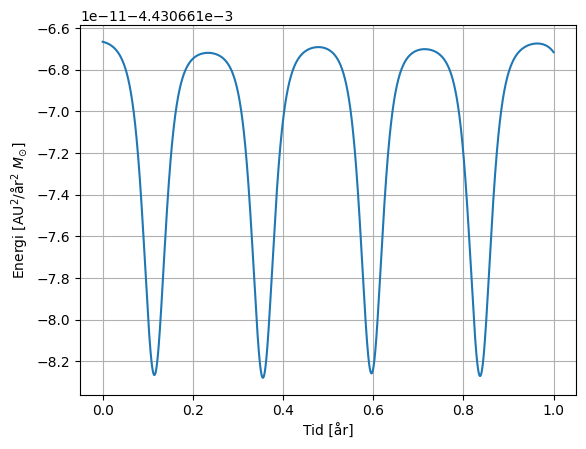

In [8]:
from tqdm import trange # gir progresjonsbar

n_tidssteg = 100_000
dt = 1e-4
n_planeter = len(r)

posisjoner = np.zeros(shape=(n_tidssteg, n_planeter, 3))
hastigheter = np.zeros(shape=(n_tidssteg, n_planeter, 3))
energi = np.zeros(shape=(n_tidssteg,))

for i in trange(n_tidssteg):
    energi[i] = get_total_energi(r=r, v=v, m=m)
    # Lagre nåværende posisjoner og hastigheter
    posisjoner[i] = r
    hastigheter[i] = v

    # Regn ut neste posisjon og hastighet
    r, v = velocity_verlet(
        r=r,
        v=v,
        m=m,
        dt=dt,
        akselerasjon_fn=get_akselerasjon,
    )

plt.plot([i * dt for i in range(n_tidssteg)], energi)
plt.xlabel("Tid [år]")
plt.ylabel("Energi [AU$^2$/år$^2$ $M_{\odot}$]")
plt.grid(True)
plt.show()




# create_animation(posisjoner[::500, :6, :2], tail_length=30)
# plt.close()
# from IPython.display import HTML
# HTML(animation.to_html5_video())

In [1]:
import numpy as np
import json

def les_data(filnavn):

    with open(filnavn, "r") as infile:
        data = json.load(infile)

    antall_planeter = len(data)
    r = np.zeros(shape=(antall_planeter, 3))
    v = np.zeros(shape=(antall_planeter, 3))
    m = np.zeros(shape=(antall_planeter,))

    for i, planet in enumerate(data):
        x = data.get(planet).get("x")
        y = data.get(planet).get("y")
        z = data.get(planet).get("z")

        vx = data.get(planet).get("vx")
        vy = data.get(planet).get("vy")
        vz = data.get(planet).get("vz")

        masse = data.get(planet).get("masse")

        r[i, 0] = x
        r[i, 1] = y
        r[i, 2] = z
        
        v[i, 0] = vx
        v[i, 1] = vy
        v[i, 2] = vz

        m[i] = masse

    navn = list(data.keys())

    return r, v, m, navn

    
r, v, m, navn = les_data(filnavn="solsystem_data.json")

In [2]:
import numpy as np

def get_akselerasjon(r, m, i, G=4 * np.pi**2):
    # Hvor mange dimensjoner er det for akselerasjonen til én planet?
    a = np.zeros(shape=(3,)) 
    
    # regn ut akselerasjonen pga alle de andre planetene
    for j in range(len(r)):
        # bare regn ut når vi ser på et annet legeme enn legeme i
        if i != j:

            # regn ut differansevektoren r_i - r_j
            dr = r[i] - r[j]
            
            # Regn ut lengden av differansevektoren r_i - r_j
            dr_norm = np.linalg.norm(dr)

            # Regn ut akselerasjonen
            a -= G * m[j] * dr / dr_norm**3
    
    return a


In [3]:
def get_kinetisk_energi(v, m):
    K = 0

    for i in range(len(v)):
        # regn ut farten til legeme i
        vi = v[i]
        vi_norm = np.linalg.norm(vi)

        # regn ut kinetisk energi til legeme i
        K += 0.5 * m[i] * vi_norm**2

    return K


def get_potensiell_energi(r, m, G=4 * np.pi**2):
    V = 0

    for i in range(len(r)):
        for j in range(i + 1, len(r)):
            if i != j:
                # regn ut differansevektoren r_i - r_j
                dr = r[i] - r[j]
                
                # Regn ut lengden av differansevektoren r_i - r_j
                dr_norm = np.linalg.norm(dr)

                # Regn ut potensiell energi
                V -= G * m[i] * m[j] / dr_norm
    
    return V


def get_total_energi(r, v, m):
    K = get_kinetisk_energi(v, m)
    V = get_potensiell_energi(r, m)
    E = K + V
    
    return E

In [4]:
def velocity_verlet(r, v, m, dt, akselerasjon_fn):
    a_gammel = np.zeros(shape=r.shape)
    for i in range(len(r)):
        a_gammel[i] = akselerasjon_fn(r=r, m=m, i=i)
        # oppdater posisjonen
    r += v * dt + 0.5 * a_gammel * dt**2

    # Regn ut akselerasjon med nye posisjoner
    a_ny = np.zeros(shape=r.shape)
    for i in range(len(r)):
        # regn ut akselerasjonen
        a_ny[i] = akselerasjon_fn(r=r, m=m, i=i)

    # Oppdater hastighetene
    v += 0.5 * (a_gammel + a_ny) * dt

    return r, v

# Eksempel på funksjonskall for å regne ut nye posisjoner og hastigheter
r, v = velocity_verlet(
    r=r,
    v=v,
    m=m,
    dt=1e-4,
    akselerasjon_fn=get_akselerasjon,
)